(-0.5, 3208.5, 2180.5, -0.5)

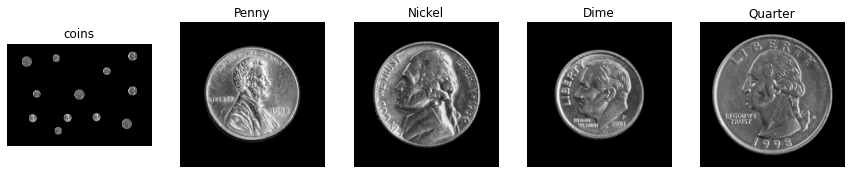

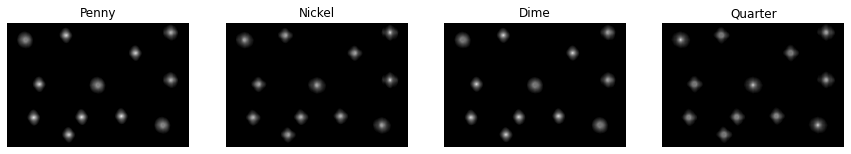

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

coins = cv.imread('D:\semester 5\EN3160\images\coins\coins.png', cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread('D:\semester 5\EN3160\images\coins\Penny.png', cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread('D:\\semester 5\\EN3160\\images\\coins\\Nickel.png', cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread('D:\semester 5\EN3160\images\coins\Dime.png', cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread('D:\semester 5\EN3160\images\coins\Quarter.png', cv.IMREAD_GRAYSCALE)
assert q is not None


#Display the images
plt.figure(figsize=(15,15))
plt.subplot(1,5,1)
plt.imshow(coins, cmap='gray')
plt.title('coins')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(p, cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(n, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(d, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(q, cmap='gray')
plt.title('Quarter')
plt.axis('off')


p_resp = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)


plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(p_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Penny')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(n_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(d_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Dime')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(q_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter')
plt.axis('off')



(-0.5, 3208.5, 2180.5, -0.5)

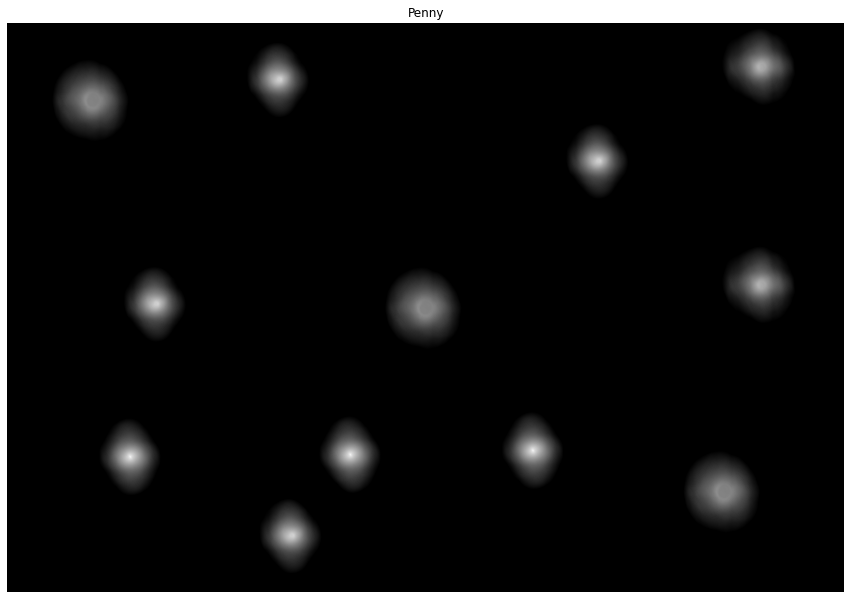

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(p_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Penny')
plt.axis('off')

Find location of the penny : highest intensity in horizontal and vertical direction - need to do an argmax
<br>
Do an arg max not only in the spatial direction(x,y diection) but also stacking up all images(axis of the coin names) - peak_local_max , from skimage.feature

In [12]:
# Vertically stack the responses along a new axis
stacked = np.stack([p_resp, n_resp, d_resp, q_resp], axis=2)

In [13]:
stacked.shape

(2181, 3209, 4)